In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline

In [361]:
pd.set_option('display.max_columns', None)

In [362]:
train = pd.read_csv('train.csv')

In [363]:
test = pd.read_csv('test.csv')

In [364]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [365]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

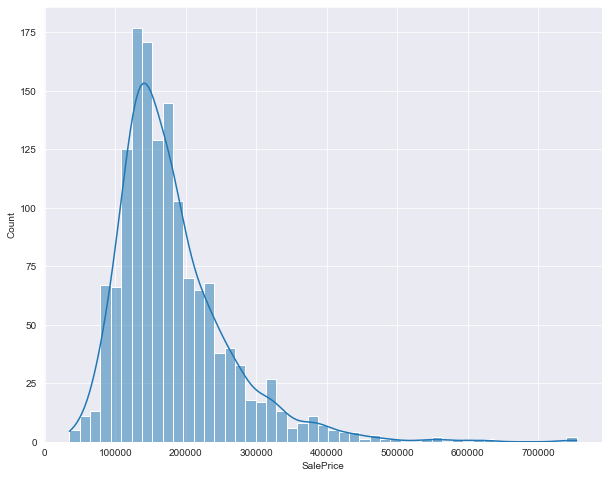

In [366]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.histplot(train['SalePrice'], kde=True)

In [367]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [368]:
q25, q75 = np.percentile(train['SalePrice'], 25), np.percentile(train['SalePrice'], 75)
iqr = q75 - q25
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff

In [369]:
train[train['SalePrice'] > upper].shape

(61, 81)

C:\Users\Taha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

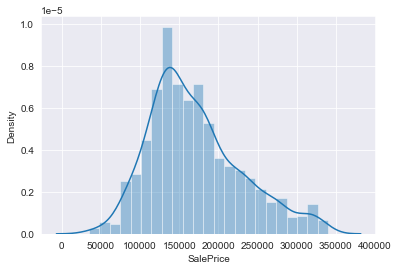

In [370]:
sns.distplot(train[train['SalePrice'] <= upper]['SalePrice'], kde=True)

In [371]:
print(train['SalePrice'].skew(), train[train['SalePrice'] <= upper]['SalePrice'].skew())

1.8828757597682129 0.6797386630838265


In [372]:
train.drop(train[train['SalePrice'] > upper].index, inplace = True)

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

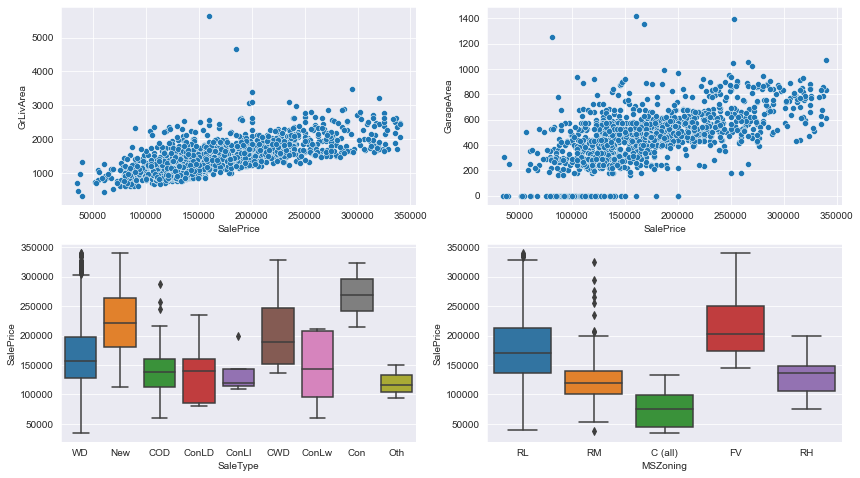

In [373]:
f, ax = plt.subplots(2, 2, figsize=(14,8))

sns.scatterplot(x='SalePrice', y='GrLivArea', data=train, ax=ax[0,0])
sns.scatterplot(x='SalePrice', y='GarageArea', data=train, ax=ax[0,1])
sns.boxplot(x='SaleType', y='SalePrice', data=train, ax=ax[1,0])
sns.boxplot(x='MSZoning', y='SalePrice', data=train, ax=ax[1,1])

In [374]:
def missing_values(df):
    missing = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
    return pd.concat([missing, percent], keys=['Total', 'Percent'], axis=1)

In [375]:
missing = missing_values(train)
missing[missing['Total'] != 0]

,Total,Percent
PoolQC,1393,0.995711
MiscFeature,1345,0.961401
Alley,1308,0.934954
Fence,1122,0.802001
FireplaceQu,689,0.492495
LotFrontage,256,0.182988
GarageCond,81,0.057898
GarageType,81,0.057898
GarageYrBlt,81,0.057898
GarageFinish,81,0.057898


In [376]:
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [377]:
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(train[['LotArea']])

IterativeImputer(random_state=0)

In [378]:
train['LotFrontage'] = imp_mean.transform(train[['LotFrontage']])

In [379]:
missing2 = missing_values(train[train['GarageCond'].isnull()])
missing2[missing2['Total'] != 0]

,Total,Percent
GarageQual,81,0.057898
GarageType,81,0.057898
GarageYrBlt,81,0.057898
GarageFinish,81,0.057898
GarageCond,81,0.057898
BsmtFinType1,7,0.005004
BsmtExposure,7,0.005004
BsmtCond,7,0.005004
BsmtQual,7,0.005004
BsmtFinType2,7,0.005004


In [380]:
train.drop(train[train['GarageCond'].isnull()].index, inplace=True)
train.drop(train[train['Electrical'].isnull()].index, inplace=True)
train.drop(train[train['MasVnrType'].isnull()].index, inplace=True)
train.drop(train[train['MasVnrArea'].isnull()].index, inplace=True)

In [381]:
train.drop(['BsmtExposure', 'BsmtCond', 'BsmtQual'], axis=1, inplace=True)

In [382]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1310 non-null   int64  
 1   MSSubClass     1310 non-null   int64  
 2   MSZoning       1310 non-null   object 
 3   LotFrontage    1310 non-null   float64
 4   LotArea        1310 non-null   int64  
 5   Street         1310 non-null   object 
 6   LotShape       1310 non-null   object 
 7   LandContour    1310 non-null   object 
 8   Utilities      1310 non-null   object 
 9   LotConfig      1310 non-null   object 
 10  LandSlope      1310 non-null   object 
 11  Neighborhood   1310 non-null   object 
 12  Condition1     1310 non-null   object 
 13  Condition2     1310 non-null   object 
 14  BldgType       1310 non-null   object 
 15  HouseStyle     1310 non-null   object 
 16  OverallQual    1310 non-null   int64  
 17  OverallCond    1310 non-null   int64  
 18  YearBuil

In [383]:
train['Porch'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
train['Exterior'] = train['Exterior1st'] + train['Exterior2nd']
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'] + train['LowQualFinSF']

In [384]:
train.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Exterior1st', 'Exterior2nd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFinType1', 
           'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1, inplace=True)

<AxesSubplot:>

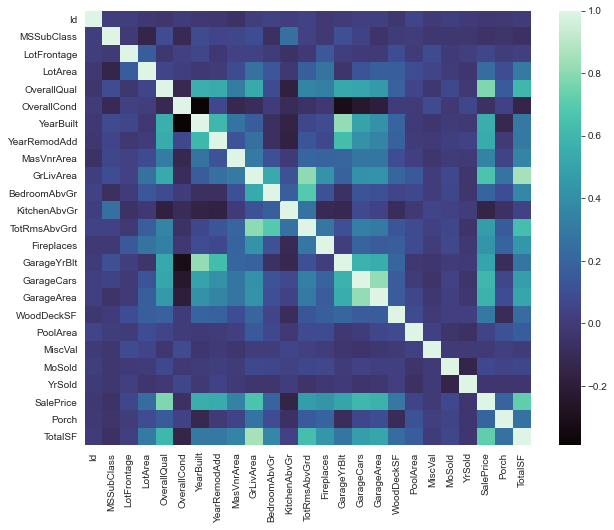

In [385]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), cmap='mako')

In [386]:
train.drop(['Id', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'PoolArea', 'BedroomAbvGr'], axis=1, inplace=True)

In [387]:
df = pd.get_dummies(train, drop_first=True)

In [388]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [389]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [390]:
lm_pred = lm.predict(X_test)

C:\Users\Taha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predictions')

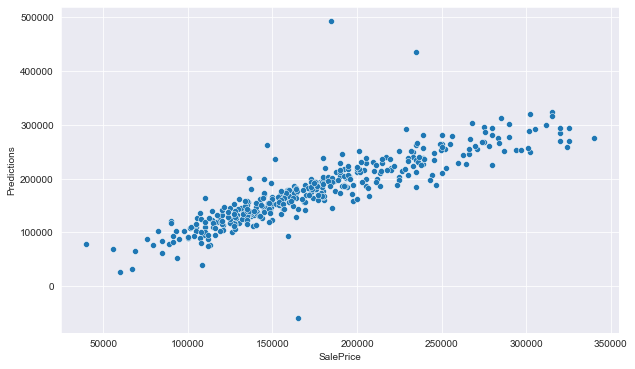

In [403]:
plt.figure(figsize=(10,6))
sns.scatterplot(y_test, lm_pred)
plt.ylabel('Predictions')

In [397]:
print(r2_score(y_test, lm_pred), mean_squared_error(y_test, lm_pred))

0.7073740998077942 962419986.079637


In [393]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [394]:
rf_pred = rf.predict(X_test)

C:\Users\Taha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predictions')

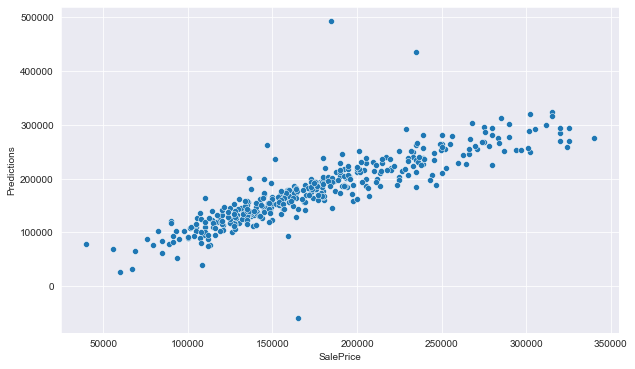

In [404]:
plt.figure(figsize=(10,6))
sns.scatterplot(y_test, lm_pred)
plt.ylabel('Predictions')

In [398]:
print(r2_score(y_test, rf_pred), mean_squared_error(y_test, rf_pred))

0.832423963045482 551142352.9055876


In [407]:
df.shape

(1310, 226)

## Hyper-parameter optimization with random forest regression 

In [408]:
param_grid = {'n_estimators': [10, 100, 1000], 'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit=True)
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 1000]})

In [409]:
pred = rf_grid.best_estimator_.predict(X_test)
print(r2_score(y_test, pred), mean_squared_error(y_test, pred))

0.8430044952208645 516343944.3496181


C:\Users\Taha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predictions')

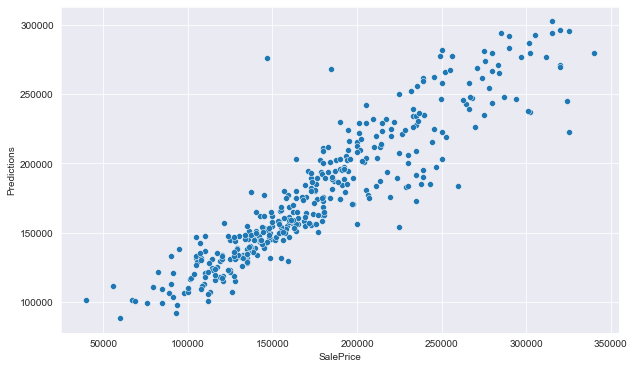

In [410]:
plt.figure(figsize=(10,6))
sns.scatterplot(y_test, pred)
plt.ylabel('Predictions')